# Завдання

In [1]:
import numpy as np
from time import process_time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FixedLocator, FixedFormatter

*Завдання 1: Завантажте MNIST. Розбийте його на навчальну, валідаційну та тренувальну вибірку. Застосуйте PCA для зменшення розмірності.*

In [47]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [48]:
# splitting
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=10000, random_state=42)


In [49]:
# PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [77]:
print(f"PCA X set shape: {X_pca.shape}")
print(f"Original training set shape: {X_train.shape}")
print(f"Reduced training set shape: {X_train_pca.shape}")
print(f"Validation set shape after PCA: {X_valid_pca.shape}")
print(f"Test set shape after PCA: {X_test_pca.shape}")

PCA X set shape: (70000, 154)
Original training set shape: (50000, 784)
Reduced training set shape: (50000, 154)
Validation set shape after PCA: (10000, 154)
Test set shape after PCA: (10000, 154)


*Завдання 2: Кластеризуйте датасет, використовуючи K-Means. Знайдіть оптимальну кількість кластерів*

Let's visualize the dataset on grapg below

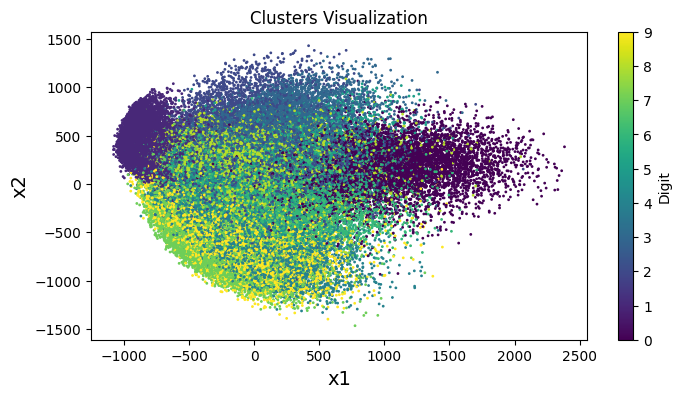

In [16]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='viridis')
    plt.xlabel("x1", fontsize=14)
    plt.ylabel("x2", fontsize=14)

plt.figure(figsize=(8, 4))
plot_clusters(X_pca, y)
plt.colorbar(label="Digit")
plt.title("Clusters Visualization")
plt.show()

Now let's create a Voronoi diagram and visualize it

In [17]:
k = 10  # Choosing 10 clusters as MNIST has 10 classes
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

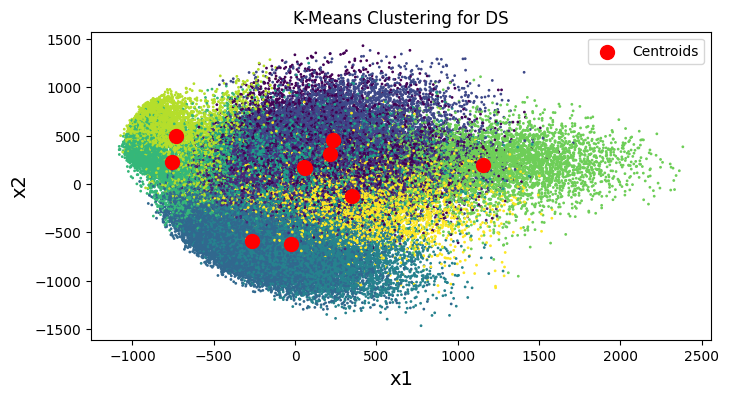

In [18]:
plt.figure(figsize=(8, 4))
plot_clusters(X_pca, y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.legend()
plt.title("K-Means Clustering for DS")
plt.show()

Short info prints:


In [20]:
print("Cluster labels for each training point:", y_pred)

print("Cluster centroids (in 2D PCA space):", kmeans.cluster_centers_)

print("Predicted clusters for new data points:", kmeans.predict(X_pca))

Cluster labels for each training point: [5 7 4 ... 3 1 9]
Cluster centroids (in 2D PCA space): [[ 2.12621742e+02  3.15117166e+02 -3.37561387e+02 ... -3.16299135e+00
   3.04682882e-01  6.97853523e-02]
 [ 5.94307254e+01  1.63410343e+02 -5.15743584e+02 ...  1.51489839e+00
  -1.56512813e+00 -5.52062030e-02]
 [ 2.30206467e+02  4.54376846e+02  6.43830832e+02 ...  4.67427402e-01
   1.72529781e-01 -2.13269533e-02]
 ...
 [ 1.15297480e+03  1.94652878e+02 -4.00867111e+01 ...  8.22278677e-01
   1.83357920e+00 -3.49486155e-01]
 [-7.30948211e+02  4.95054431e+02 -2.37152908e+02 ...  4.47971253e-01
   1.40893462e+00 -8.27356267e-01]
 [ 3.51151259e+02 -1.22948075e+02 -1.95325895e+02 ...  8.11364762e-01
   2.61646676e-02 -1.18605873e-01]]
Predicted clusters for new data points: [5 7 4 ... 3 1 9]


# Optimal Cluster amount

Let's check the optimal N for clusters using 3 statistical methods one by one:

# Elbow Method

In [21]:
wcss = []
k_values = range(1, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

In [22]:
#elbow point by calculating the second derivative of WCSS
wcss_diff = np.diff(wcss)
wcss_diff2 = np.diff(wcss_diff)
elbow_point = 2 + np.argmin(wcss_diff2)   # +2 to account for the double diff and zero-indexing

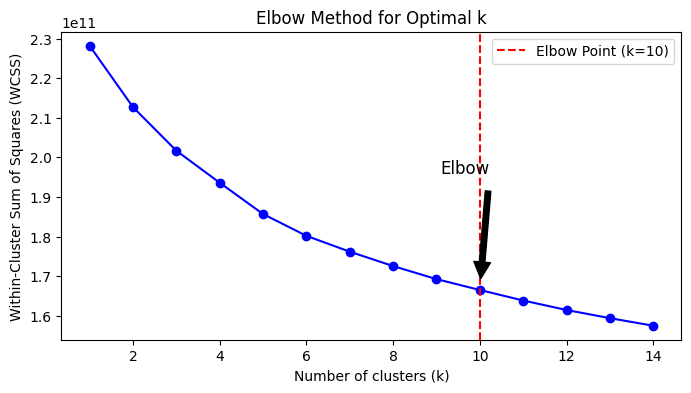

In [23]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point (k={elbow_point})')
plt.annotate('Elbow',
             xy=(elbow_point, wcss[elbow_point - 1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.legend()
plt.show()


As we can see, this plot has an "elbow" at \( k=10 \), meaning that after this point, the inertia starts to decrease more slowly as we add more clusters. We can assume that \( k=10 \) is a good estimate for the optimal number of clusters.

# Sillouhette  Method

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_pca_scaled =sc.fit_transform(X_pca)

In [27]:
silhouette_scores = []
k_values = range(2, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, y_pred)
    silhouette_scores.append(score)

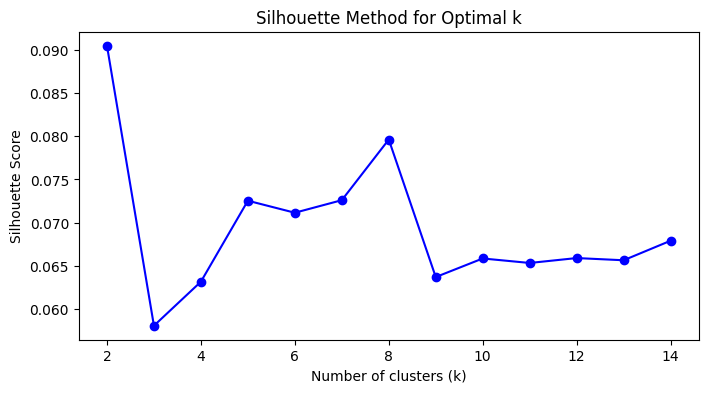

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

The best coeffiecient pops out when k=2 (about 0.9), but k=5; k=6; k=7; k=8 show normal performance as well.

#  _Silhouette diagram_

In [30]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 10)]

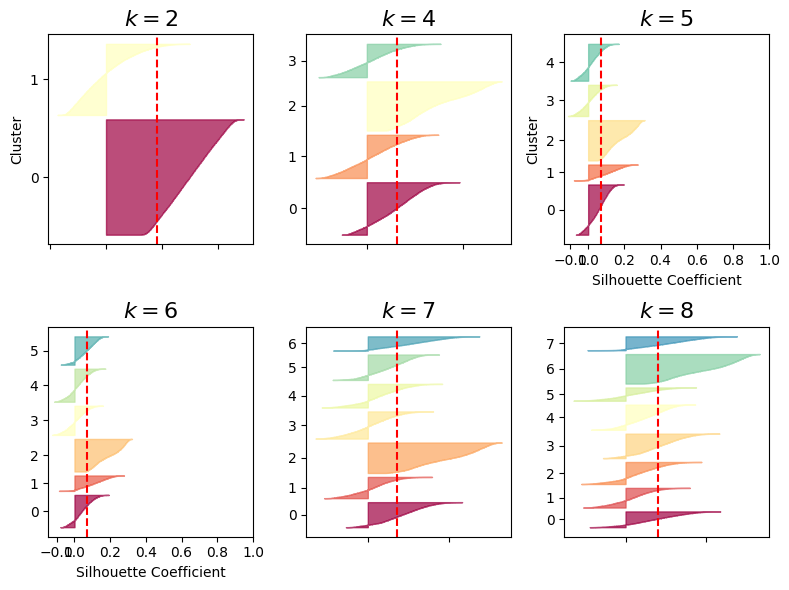

In [39]:
plt.figure(figsize=(8, 6))
for i, k in enumerate([2, 4, 5, 6, 7,8], 1):
    plt.subplot(2, 3, i)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_train_pca) // 30
    pos = padding
    ticks = []
    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()

        color = plt.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (2, 6):
        plt.ylabel("Cluster")
    if k in (6, 7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()

Based on these graphs, k=7, k=8 seem to be good choice. It balances well-defined clusters with minimal overlap. an average silhouette score is reasonably high.
Both k=4, k=6 and k=5 could be options, but previously mentioned two have some advantages with higher silhouette scores across clusters and more balanced cluster sizes.
about k=2: too few clusters, leading to poor separation for at least one cluster.
k=6=8:might add unnecessary complexity without improving the quality.

In [56]:
X_pca_blobs, y = make_blobs(750, n_features=2, centers=10)

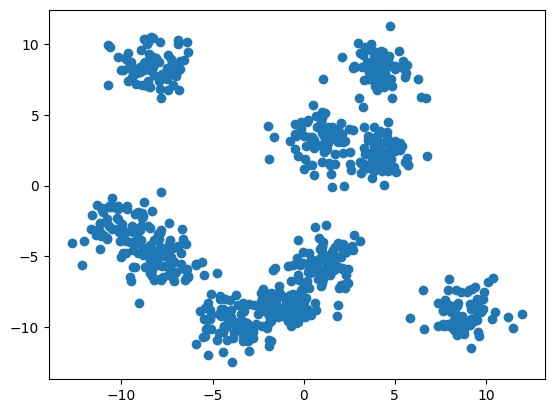

In [57]:
plt.scatter(X_pca_blobs[:, 0], X_pca_blobs[:, 1])
plt.show()

In [75]:
def optimalK(data, max_clusters):
    nrefs = 10  # n of rand reference datasets
    gaps = np.zeros(max_clusters - 1)
    resultsdf = pd.DataFrame({'clusterCount': [], 'gap': []})
    np.random.seed(42)

    for k in range(1, max_clasters):
        ref_disps = np.zeros(nrefs)

        for i in range(nrefs):
            # random reference dataset with same shape as X_pca
            random_reference = np.random.random_sample(size=data.shape)

            # k-means to the rand DS
            km = KMeans(n_clusters=k, random_state=42)
            km.fit(random_reference)

            # sum of sqrd distances to the nearest cluster centre
            ref_disp = km.inertia_
            ref_disps[i] = ref_disp

        # put k-means to actual data and calculate its dispersion
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(data)
        origDisp = km.inertia_

        # calc the gap stats
        gap = np.log(np.mean(ref_disps)) - np.log(origDisp)
        gaps[k - 1] = gap
        new_row = pd.DataFrame({'clusterCount': [k], 'gap': [gap]})
        resultsdf = pd.concat([resultsdf, new_row], ignore_index=True)

    # optimal k is where gap is the largest
    optimal_k = gaps.argmax() + 1
    return optimal_k, resultsdf

# decided to make an interval smaller(max_clusters), as we've already saw that anything after 10 is not interesting to us
# and 9 and 10 have the lowest silhouette scores
k, resultsdf = optimalK(X_pca, max_clusters=8)
print('Optimal k:', k)

Optimal k: 7


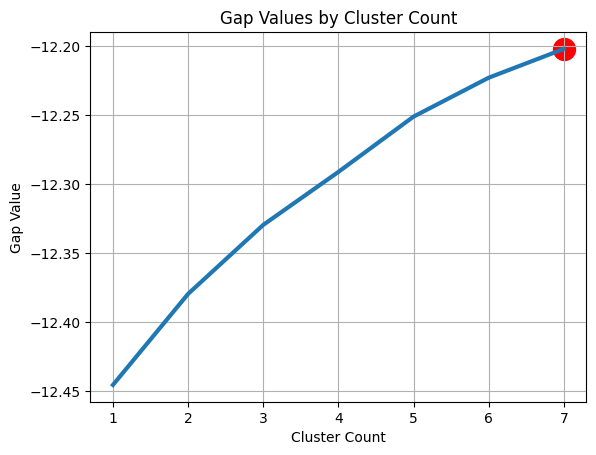

In [76]:
plt.plot(resultsdf.cluster_count, resultsdf.gap, linewidth=3)
plt.scatter(resultsdf[resultsdf.clusterCount == k].cluster_count, resultsdf[resultsdf.cluster_count == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

The plot shows that the gap statistic value increases with the number of clusters.
The maximum gap statistic is at k=7, as indicated by the red dot, suggesting that 7 clusters may be the optimal number for this dataset. This is where the clustering structure best balances separation compared to random noise.

Plotting the final choice

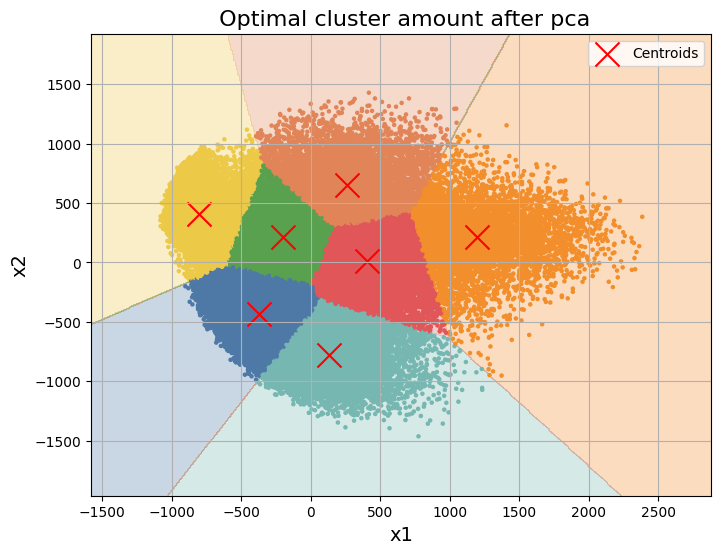

In [72]:

kmeans_2d = KMeans(n_clusters=7, random_state=42)
X_pca_2d = X_pca[:, :2]
y_pred_2d = kmeans_2d.fit_predict(X_pca_2d)

# the plot boundaries
x_min, x_max = X_pca_2d[:, 0].min() - 500, X_pca_2d[:, 0].max() + 500
y_min, y_max = X_pca_2d[:, 1].min() - 500, X_pca_2d[:, 1].max() + 500

# grid for plotting decision boundaries
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10), np.arange(y_min, y_max, 10))
Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap = ListedColormap(['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#E18559'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)  # Plot the decision boundary

# points, colored by their cluster assignment
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_pred_2d, cmap=cmap, s=5)

# centroids
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1],
            s=300, c='red', marker='x', label='Centroids')
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.title(" Optimal cluster amount after pca (k=7)", fontsize=16)
plt.legend(loc="upper right")
plt.grid(True)

plt.show()


I'd try to use more methods to say for sure what's the best value N for k. For now, I'd prefer to use k=7 or k=8.